# Problem Statement:
#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands



## Importing Libraries

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import calendar

## Understanding Data

In [3]:
bike_sharing=pd.read_csv('day.csv')

In [4]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing.shape

(730, 16)

In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>No Null/ Missing  values</p>
</div>

## Cleaning data

### Removing Unwanted Columns
     Instant-- its the record index and the records are unique without it so dropping it
     Casual and Registered: cnt is our y variable and Casual + Registered =cnt so removing Casual, Regsitered
     dteday-- this resembles to the actual date, as we already have Month and Year dropping this variable 
     
Note: The new dataframe is named as bike_sharing_new

In [8]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike_sharing_new=bike_sharing.drop(['instant','casual','registered','dteday'],axis=1)

In [10]:
bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Univariate, Bivariate Analysis

In [11]:
bike_sharing_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Contineous Variables

<AxesSubplot:>

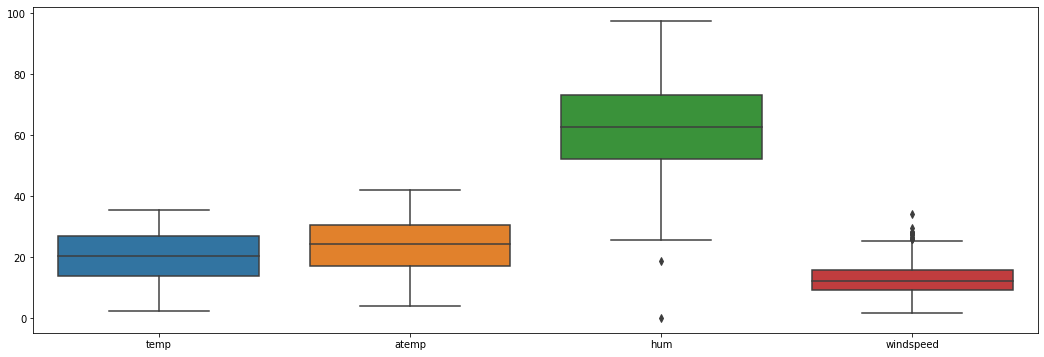

In [12]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data=bike_sharing_new[['temp', 'atemp', 'hum','windspeed']])

# Categorical Variables

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

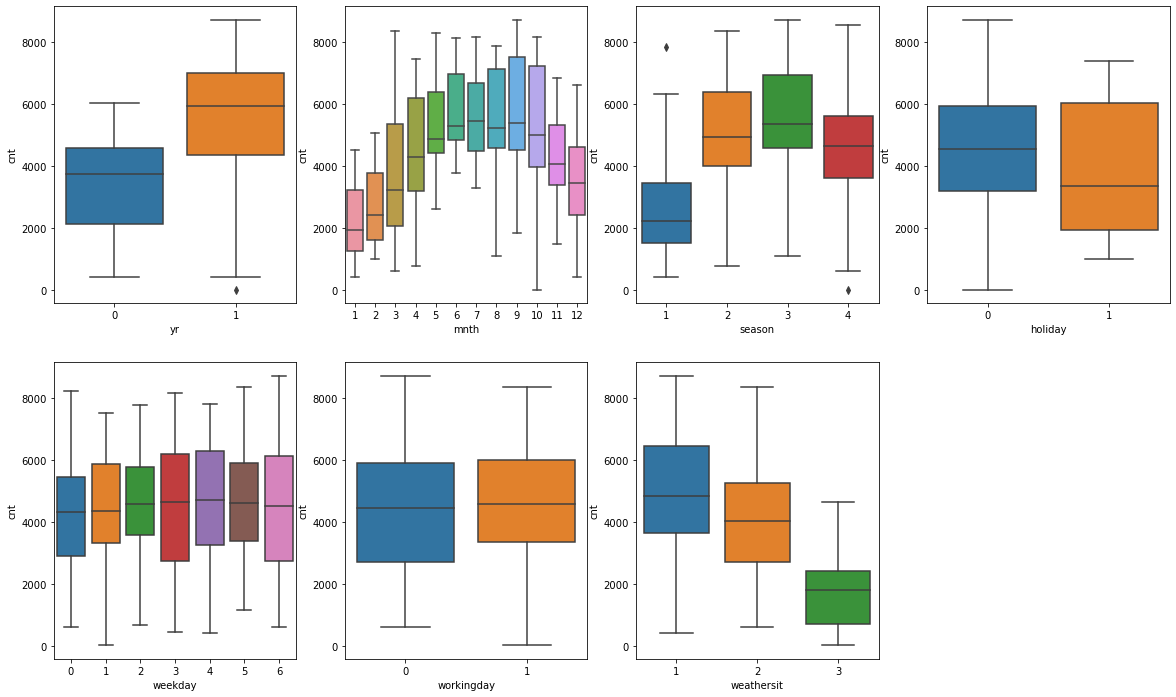

In [13]:
plt.figure(figsize=(20,12))
 
 
plt.subplot(2,4,1)
sns.boxplot(x='yr',y='cnt',data=bike_sharing_new)
plt.subplot(2,4,2)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing_new)
plt.subplot(2,4,3)
sns.boxplot(x='season',y='cnt',data=bike_sharing_new)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing_new)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing_new)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing_new)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing_new)



## <font color=red> Conslusions:</font>
Graph clearly shows the qualitative distribution
1) More bikes are rented in 2019 as compared to 2018

2) Highest number of Bikes are rented in Month of July

3) Highest number of bikes are rented in Fall

4) Count of Bikes is less during Holidays

5) Count is constant thruout the week

6) Count is Higher during Working day as compared to Non working day

7) Most bikes are rented when weather is clear as compared to Light snow and heavy rains



# we will now plot scatter plots on Contineous Variables 
trying to determine below

1) if linear relationship exists between the two

2) if multicolinearity exists 

3) Try to see if any variable have strong corelation 


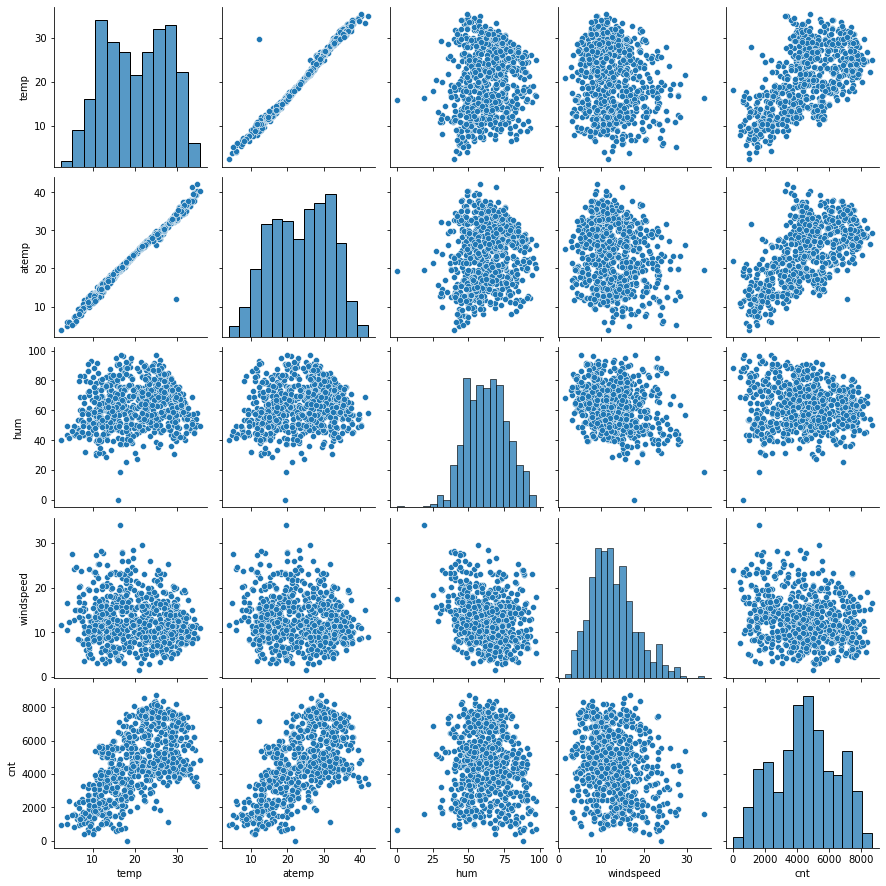

In [14]:
bike_q_columns=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike_sharing_new[bike_q_columns])

## <font color=red>Conslusion:</font>
i believe Linear regression can be used as there are atleast few variables like Temp, atemp having linear distribution

# Data Preparation

This would involve the below steps

1) Translate the Categorical variables to their own strings

2) Create dummy variable for each of these categories



In [15]:
bike_sharing_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
# season
bike_sharing_new['season']=bike_sharing_new['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

# month
bike_sharing_new['mnth'] = bike_sharing_new['mnth'].apply(lambda x: calendar.month_abbr[x])
# holiday
bike_sharing_new['weekday']=bike_sharing_new['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
# holiday
bike_sharing_new['weathersit']=bike_sharing_new['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})


In [17]:
 bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
dummy=bike_sharing_new[['season','mnth','weekday','weathersit']]

dummy=pd.get_dummies(dummy,drop_first=True)

In [19]:
bike_sharing_new=pd.concat([bike_sharing_new,dummy],axis=1)

#### Delete the original columns

In [20]:
bike_sharing_new=bike_sharing_new.drop(['season','mnth','weekday','weathersit'],axis=1)

In [21]:
bike_sharing_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## Split data into Test and Training set

In [22]:
df_train,df_test=train_test_split(bike_sharing_new,train_size=0.7,random_state=42)

# Train the scaler on Train data

In [23]:
#instantiate
scalar = MinMaxScaler()
#create a list of numeric
num_vars=['temp','atemp','hum','windspeed','cnt']
#fit on data-- ignore binary variables
df_train[num_vars]=scalar.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,1,0,0,0,0,0,0,1,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.439696,0,0,...,0,1,0,0,0,0,1,0,0,1


In [24]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.668627,0.551313,0.526919,0.654203,0.415045,0.497429,0.231373,0.258824,...,0.090196,0.090196,0.149020,0.150980,0.152941,0.145098,0.131373,0.141176,0.029412,0.345098
std,0.500106,0.163554,0.471169,0.227237,0.212992,0.143788,0.185760,0.234207,0.422124,0.438419,...,0.286744,0.286744,0.356457,0.358381,0.360284,0.352545,0.338139,0.348545,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.344772,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.501871,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.677080,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plotting Heatmap to see the correlations

<AxesSubplot:>

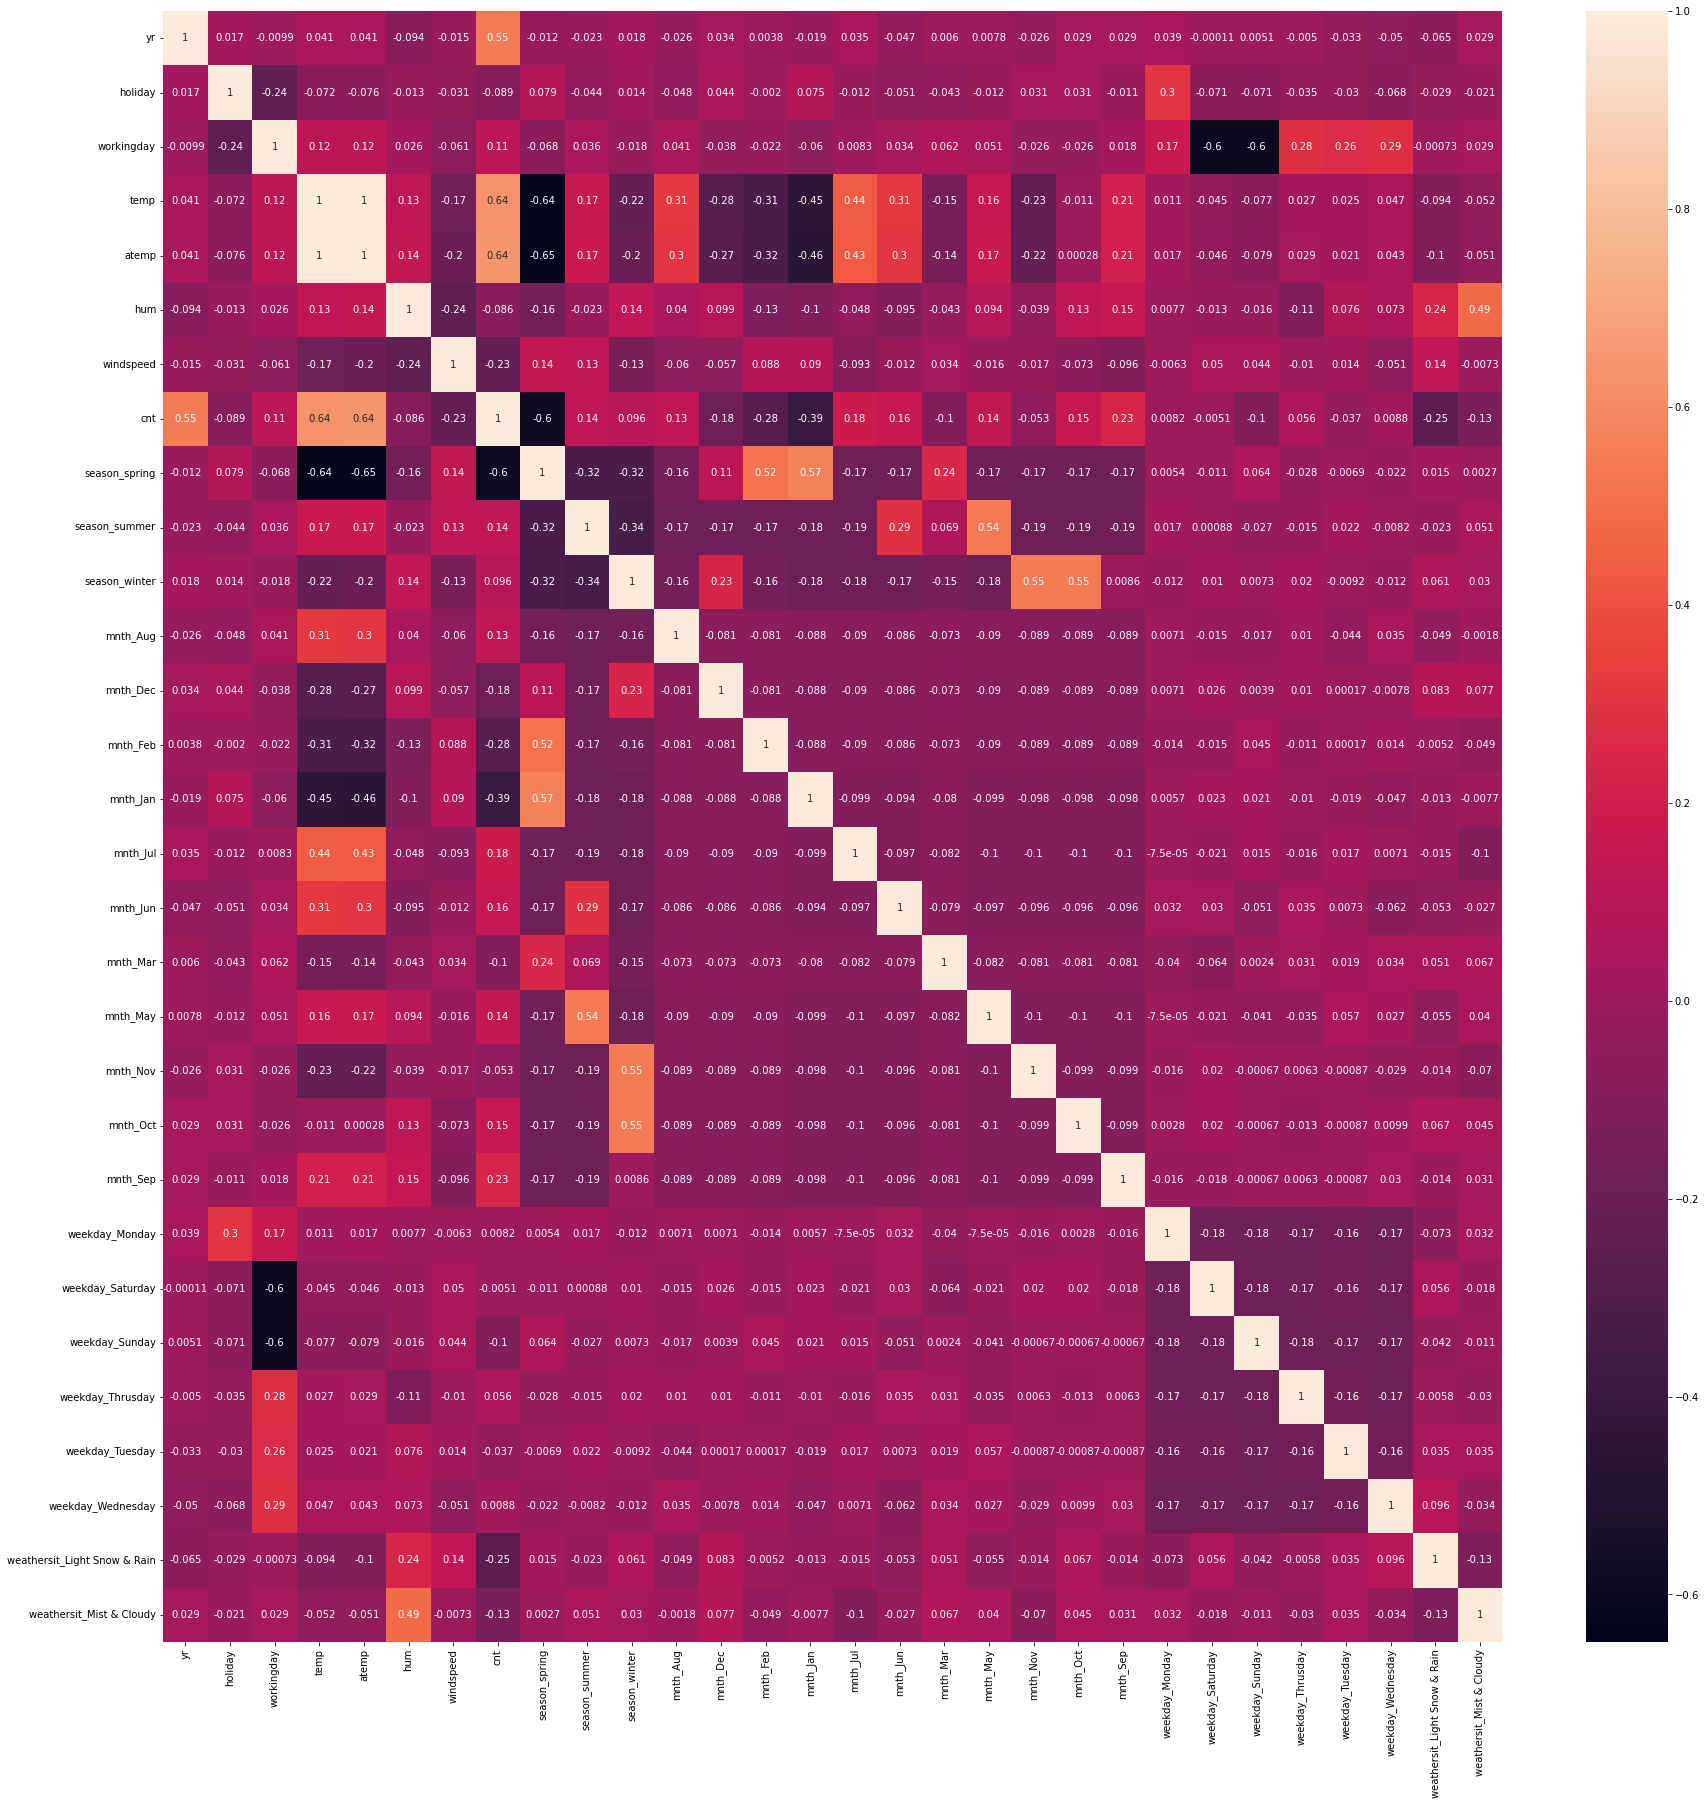

In [25]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True)

### <font color=red>Conslusion</font>
As seen before here also we see correlation between cnt and Temp and aTemp, other variables also do have correlation but nothing much can be said, we will start building model with all variables 


# Building of model
we would be using Hybrid approach to build this model

Starting with RFE with a small step and then eliminating others 


In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(estimator=lm, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 14),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 9),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [29]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_Monday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [30]:
columns_by_rfe=X_train.columns[rfe.support_]

In [31]:
X_train_rfe=X_train[columns_by_rfe]

In [32]:
X_train_rfe.head()

,yr,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jul,mnth_Mar,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
645,1,0.403972,0.404998,0.731215,0.419004,0,1,0,0,0,0,0,0,0,1
163,0,0.717562,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,0,0,0
360,0,0.331287,0.326273,0.785745,0.415925,1,0,1,0,0,0,0,0,0,1
640,1,0.745598,0.682653,0.817947,0.110593,0,1,0,0,0,0,0,0,0,1
625,1,0.703024,0.637937,0.899098,0.839562,0,0,0,0,0,0,1,0,0,1


## Model-1

In [33]:
#add another variable
#add a constant
X_train_sm=sm.add_constant(X_train_rfe)
#create first model
lr=sm.OLS(y_train,X_train_sm)

#fit model
lr_model=lr.fit()

#params
lr_model.params

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.07e-184
Time:                        07:04:01   Log-Likelihood:                 482.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3283      0.037      8.862      0.000       0.256       0.401
yr                               0.2365      0.009     27.513      0.000       0.220       0.253
temp                             0.0226      0.245      0.092      0.927      -0.460       0.505
atemp                            0.4498      0.263      1.713      0.087      -0.066       0.966
hum                             -0.1673      0.041     -4.128      0.000      -0.247      -0.088
windspeed                       -0.1128      0.026     -4.356      0.000      -0.164      -0.062
season_spring                   -0.1573      0.017     -9.200      0.000      -0.191      -0.124
season_winter                    0.0900      0.015      6.206      0.000       0.062       0.119
mnth_Dec                        -0.0639      0.018     -3.498      0.001      -0.100      -0.028
mnth_Jul                        -0.0593      0.017     -3.478      0.001      -0.093      -0.026
mnth_Mar                         0.0518      0.018      2.811      0.005       0.016       0.088
mnth_Nov                        -0.0848      0.019     -4.390      0.000      -0.123      -0.047
mnth_Sep                         0.0562      0.016      3.558      0.000       0.025       0.087
weekday_Saturday                 0.0178      0.012      1.498      0.135      -0.006       0.041
weathersit_Light Snow & Rain    -0.2185      0.029     -7.587      0.000      -0.275      -0.162
weathersit_Mist & Cloudy        -0.0572      0.011     -5.098      0.000      -0.079      -0.035
==============================================================================
Omnibus:                       85.705   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.606
Skew:                          -0.910   Prob(JB):                     2.23e-40
Kurtosis:                       5.298   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Only Temp is having P value > 0.5

### Calculate the VIF

In [34]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,atemp,1225.70
1,temp,1196.45
3,hum,25.44
4,windspeed,5.37
6,season_winter,2.74
5,season_spring,2.73
14,weathersit_Mist & Cloudy,2.27
0,yr,2.09
10,mnth_Nov,1.82
8,mnth_Jul,1.49


### lot of values are havign VIF>5 we will proceed with dropping atemp for now

In [35]:
X_train_rfe=X_train_rfe.drop('atemp',axis=1)

## Model 2

In [36]:


#Removed another variable
#add a constant
X_train_sm=sm.add_constant(X_train_rfe)
#create first model
lr1=sm.OLS(y_train,X_train_sm)

#fit model
lr1_model=lr1.fit()

#params
lr1_model.params

#summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.34e-185
Time:                        07:04:02   Log-Likelihood:                 481.07
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     495   BIC:                            -868.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3364      0.037      9.138      0.000       0.264       0.409
yr                               0.2366      0.009     27.468      0.000       0.220       0.254
temp                             0.4389      0.035     12.514      0.000       0.370       0.508
hum                             -0.1595      0.040     -3.953      0.000      -0.239      -0.080
windspeed                       -0.1239      0.025     -4.935      0.000      -0.173      -0.075
season_spring                   -0.1600      0.017     -9.384      0.000      -0.194      -0.127
season_winter                    0.0917      0.014      6.324      0.000       0.063       0.120
mnth_Dec                        -0.0632      0.018     -3.455      0.001      -0.099      -0.027
mnth_Jul                        -0.0599      0.017     -3.510      0.000      -0.093      -0.026
mnth_Mar                         0.0547      0.018      2.977      0.003       0.019       0.091
mnth_Nov                        -0.0851      0.019     -4.397      0.000      -0.123      -0.047
mnth_Sep                         0.0537      0.016      3.409      0.001       0.023       0.085
weekday_Saturday                 0.0177      0.012      1.486      0.138      -0.006       0.041
weathersit_Light Snow & Rain    -0.2257      0.029     -7.907      0.000      -0.282      -0.170
weathersit_Mist & Cloudy        -0.0589      0.011     -5.257      0.000      -0.081      -0.037
==============================================================================
Omnibus:                       82.709   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.114
Skew:                          -0.885   Prob(JB):                     1.55e-38
Kurtosis:                       5.249   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now the p value of temp also went below 0.5 so model looks good from this view we will check VIF

In [37]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,hum,23.91
1,temp,16.94
3,windspeed,5.12
4,season_spring,2.72
5,season_winter,2.71
13,weathersit_Mist & Cloudy,2.23
0,yr,2.09
9,mnth_Nov,1.82
7,mnth_Jul,1.49
6,mnth_Dec,1.37


## we still see some values >5 ; eliminating hum and retraining the model and calculating VIF

In [38]:
X_train_rfe=X_train_rfe.drop('hum',axis=1)

## Model 3

In [39]:
#removed another variable
#add a constant
X_train_sm=sm.add_constant(X_train_rfe)
#create first model
lr2=sm.OLS(y_train,X_train_sm)

#fit model
lr2_model=lr2.fit()

#params
lr2_model.params

#summary
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.02e-183
Time:                        07:04:02   Log-Likelihood:                 473.14
No. Observations:                 510   AIC:                            -918.3
Df Residuals:                     496   BIC:                            -859.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2429      0.029      8.486      0.000       0.187       0.299
yr                               0.2413      0.009     27.882      0.000       0.224       0.258
temp                             0.4152      0.035     11.842      0.000       0.346       0.484
windspeed                       -0.0947      0.024     -3.891      0.000      -0.143      -0.047
season_spring                   -0.1629      0.017     -9.427      0.000      -0.197      -0.129
season_winter                    0.0863      0.015      5.891      0.000       0.057       0.115
mnth_Dec                        -0.0678      0.019     -3.659      0.000      -0.104      -0.031
mnth_Jul                        -0.0543      0.017     -3.143      0.002      -0.088      -0.020
mnth_Mar                         0.0591      0.019      3.177      0.002       0.023       0.096
mnth_Nov                        -0.0854      0.020     -4.352      0.000      -0.124      -0.047
mnth_Sep                         0.0477      0.016      2.994      0.003       0.016       0.079
weekday_Saturday                 0.0180      0.012      1.492      0.136      -0.006       0.042
weathersit_Light Snow & Rain    -0.2725      0.026    -10.332      0.000      -0.324      -0.221
weathersit_Mist & Cloudy        -0.0845      0.009     -9.106      0.000      -0.103      -0.066
==============================================================================
Omnibus:                       79.863   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.286
Skew:                          -0.857   Prob(JB):                     2.86e-37
Kurtosis:                       5.232   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### P Values now look below 0.5, calculating VIF

In [40]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
1,temp,5.45
2,windspeed,5.08
4,season_winter,2.36
0,yr,2.08
3,season_spring,1.80
8,mnth_Nov,1.78
12,weathersit_Mist & Cloudy,1.57
6,mnth_Jul,1.44
5,mnth_Dec,1.33
9,mnth_Sep,1.24


### we will try to now remove season_spring as we know temp is having a linear regression, and season_spring is having high correlation with temp

In [41]:
X_train_rfe=X_train_rfe.drop('season_spring',axis=1)

In [42]:
#removed another variable
#add a constant
X_train_sm=sm.add_constant(X_train_rfe)
#create first model
lr3=sm.OLS(y_train,X_train_sm)

#fit model
lr3_model=lr3.fit()

#params
lr3_model.params

#summary
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.75e-166
Time:                        07:04:02   Log-Likelihood:                 431.11
No. Observations:                 510   AIC:                            -836.2
Df Residuals:                     497   BIC:                            -781.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0484      0.022      2.248      0.025       0.006       0.091
yr                               0.2386      0.009     25.428      0.000       0.220       0.257
temp                             0.6572      0.026     25.375      0.000       0.606       0.708
windspeed                       -0.0806      0.026     -3.057      0.002      -0.132      -0.029
season_winter                    0.1484      0.014     10.461      0.000       0.121       0.176
mnth_Dec                        -0.0636      0.020     -3.168      0.002      -0.103      -0.024
mnth_Jul                        -0.0739      0.019     -3.975      0.000      -0.110      -0.037
mnth_Mar                         0.0407      0.020      2.026      0.043       0.001       0.080
mnth_Nov                        -0.0537      0.021     -2.558      0.011      -0.095      -0.012
mnth_Sep                         0.0487      0.017      2.819      0.005       0.015       0.083
weekday_Saturday                 0.0238      0.013      1.818      0.070      -0.002       0.050
weathersit_Light Snow & Rain    -0.2577      0.029     -9.025      0.000      -0.314      -0.202
weathersit_Mist & Cloudy        -0.0792      0.010     -7.881      0.000      -0.099      -0.059
==============================================================================
Omnibus:                       34.133   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.568
Skew:                          -0.519   Prob(JB):                     2.84e-11
Kurtosis:                       4.099   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now the p values are all below 0.5 lets calculate VIF

In [43]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
1,temp,4.96
2,windspeed,3.94
3,season_winter,2.24
0,yr,2.03
7,mnth_Nov,1.78
11,weathersit_Mist & Cloudy,1.56
5,mnth_Jul,1.44
4,mnth_Dec,1.29
8,mnth_Sep,1.24
9,weekday_Saturday,1.18


### VIF values are also below 5 so the model lr3_model seems to be good with 80% accuracy

## Residual Analysis of the train data

To make sure Error terms are normally distributed across 0 we would plot a histogram of pred-actual

In [44]:
y_train_pred=lr3_model.predict(X_train_sm)

In [45]:
residual=y_train_pred-y_train

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

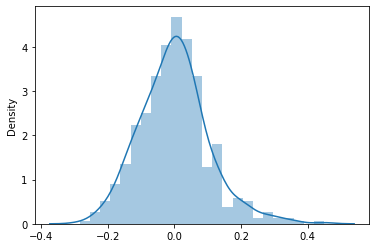

In [46]:
 
sns.distplot(residual)

Text(0, 0.5, 'residual')

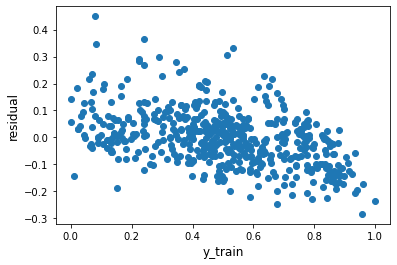

In [47]:
fig = plt.figure()
plt.scatter(y_train, residual)
plt.xlabel('y_train', fontsize = 12)                       
plt.ylabel('residual', fontsize = 12)

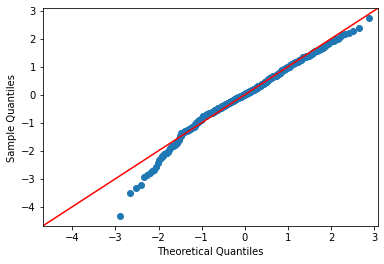

In [48]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

## <font color=red>Conclusion:</font>
We can clearly see that the error terms are centred around 0 and follows a normal distribution
and the variance of residual is constant across 0
here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed

## Making Prediction on final model

## Scaling my test dataset

In [49]:
 
num_vars=['temp','atemp','hum','windspeed','cnt']
#transform on trained scalar
df_test[num_vars]=scalar.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,...,0,0,0,1,0,0,0,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,...,0,0,0,0,1,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,1,0,0,0,1,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,...,0,0,0,0,0,1,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,...,0,0,0,0,0,1,0,0,0,0


In [50]:
y_test=df_test.pop('cnt')
X_test=df_test


## Remove the unwanted columns from X_test

In [51]:

columns=['yr', 'temp', 'windspeed', 'season_winter', 'mnth_Dec',
       'mnth_Jul', 'mnth_Mar', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy']
X_test_new=X_test[columns]

## Add constant to X_test

In [52]:
X_test_new.columns

Index(['yr', 'temp', 'windspeed', 'season_winter', 'mnth_Dec', 'mnth_Jul',
       'mnth_Mar', 'mnth_Nov', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [53]:
X_test_sm=sm.add_constant(X_test_new)

In [54]:
y_test_pred=lr3_model.predict(X_test_sm)

In [55]:
y_test_pred

468    0.633711
148    0.507928
302    0.378611
355    0.198753
515    0.760528
         ...   
532    0.699039
558    0.672829
137    0.335006
314    0.301186
683    0.491165
Length: 220, dtype: float64

## Calculating the R2 Score
R2 score is goodness of fit measure of the model. Indicates the variance of each dependent varaiable that the independent variable explains collectively

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8051404139866096

## <font color=red>Conclusion</font>

The R2_score on test Model is 80.5 which is nearly equal to the r2_score of 80.3on Training set, which means whatever the model lernt its able to apply the same on test data 

## Actual verses Predicted

Text(0, 0.5, 'y_pred')

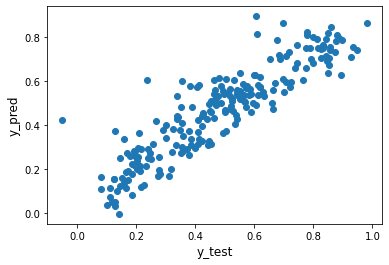

In [57]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 12)                       
plt.ylabel('y_pred', fontsize = 12)

## <font color=red>Conclusion</font>
Final model is not a fit by chance and has got a decent predictive power

In [58]:
param = pd.DataFrame(lr3_model.params)
param.columns=['coefficients']
param

,coefficients
const,0.048372
yr,0.238597
temp,0.657234
windspeed,-0.080592
season_winter,0.148416
mnth_Dec,-0.063650
mnth_Jul,-0.073902
mnth_Mar,0.040691
mnth_Nov,-0.053652
mnth_Sep,0.048667


From the above the equation of our model is as below
cnt=0.657234*temp+0.238597*yr+0.148416*season_winter+0.048667*mnth_Sep+0.040691*mnth_Mar+0.023807*weekday_Saturday-0.053652*mnth_Nov-0.06365*mnth_Dec-0.073902*mnth_Jul-0.079208*weathersit_Mist & Cloudy-0.080592*windspeed-0.257739*weathersit_Light Snow & Rain





































### Positive coefficients indicate increase in these values increase the value of cnt
### Negative Coefficients indicate increase in these values decrease the value of cnt

## <font color=red> Conclusion</font>
From R-Sqaured and adj R-Sqaured value of both train and test we can say above variables define 79% of Bike demand

Top Three features are

Temprature (0.657234)

weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.257739)

year (0.238597)

Hence, it can be clearly concluded that the variables Temp , season/ weather situation  Year and month are significant in predicting the demand for shared bikes .

## <font color=red>Final Recommendations for the Company:</font>

1)Temprature is a major factor with increase in temprature the demand also increases

2)The Months of July August and Sep has high demand so should be considered

3)Demand increases duriung fall, should be prepared for high demand


